In [1]:
import cogsworth
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astropy.units as u

In [24]:
# this all just makes plots look nice
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)
pd.options.display.max_columns = 999

In [15]:
p = cogsworth.pop.Population(1000, final_kstar1=[10, 11, 12])
p.create_population()

Run for 1000 binaries
Ended up with 1084 binaries with m1 > 0 solar masses
[4e-02s] Sample initial binaries
[1.8s] Evolve binaries (run COSMIC)


1098it [00:05, 205.98it/s]                                                      


[7.1s] Get orbits (run gala)
Overall: 9.0s


In [34]:
# return a collection of LEGWORK sources for all bound binaries in the population
sources = p.to_legwork_sources(assume_mw_galactocentric=True)
sources

And that's it! Now we can use ``LEGWORK`` to learn more about these sources.

In [35]:
# return a collection of LEGWORK sources for all bound binaries in the population
sources = p.to_legwork_sources(distances=1 * u.pc * np.ones(len(p)))
sources

Now we calculate the SNR with the following and let's print out the top three sources

In [41]:
sources.get_snr()
np.sort(sources.snr)[-3:]

array([209.76833486, 295.16467453, 463.0752157 ])

You can also plot these sources on the sensitivity curve. Let's plot up the ones that meet a threshold of SNR = 7.

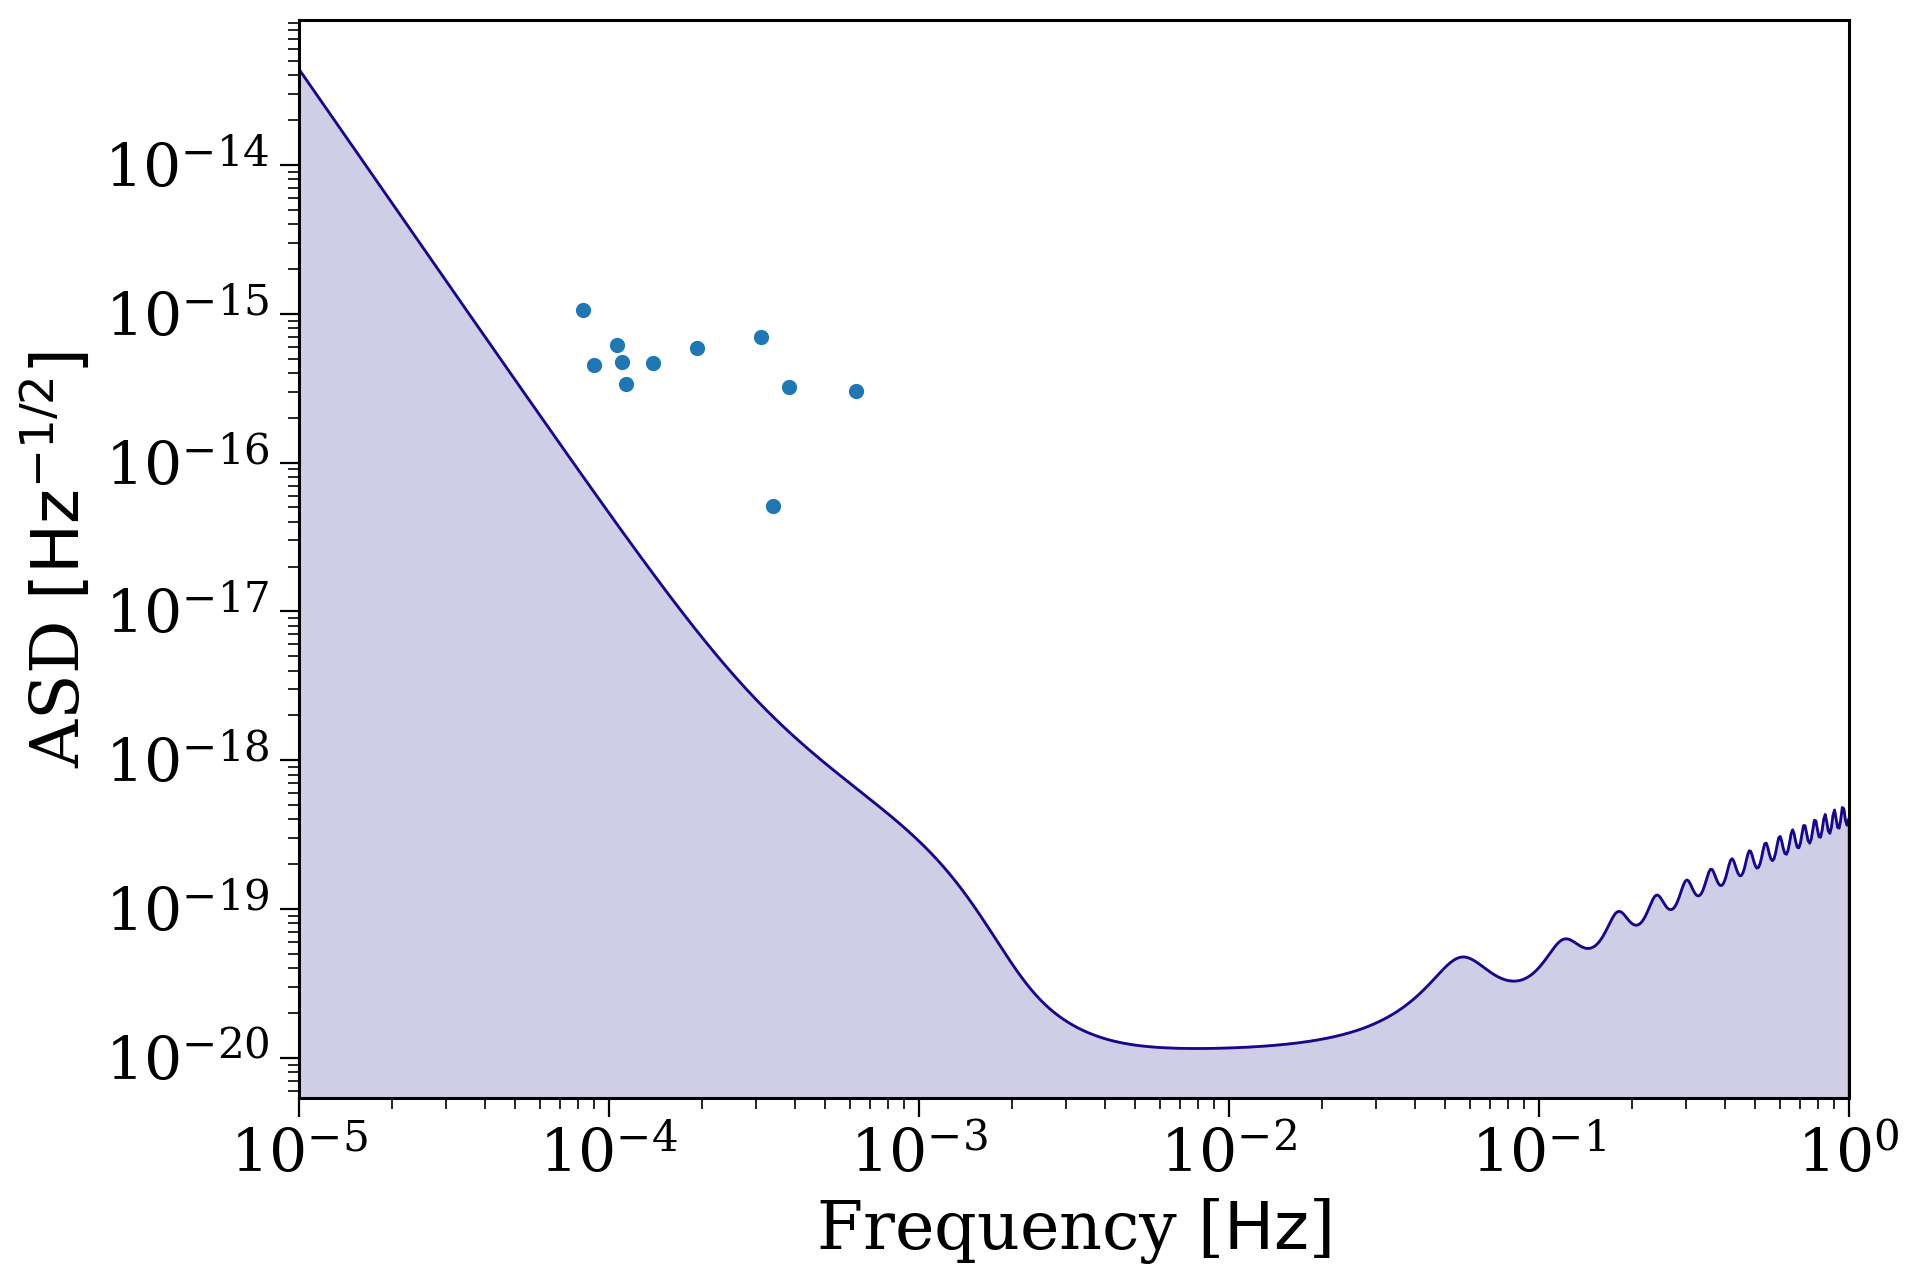

In [48]:
sources.plot_sources_on_sc(snr_cutoff=7);